# Computer Vision CSCI-GA.2272-001 Assignment 1, part 1.

Fall 2021 semester.

Due date: **September 30th 2021.**

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch by modifying this ipython notebook (File-->Save a copy...).

To install PyTorch, follow instructions at http://pytorch.org/

Please submit your assignment by uploading this iPython notebook to Brightspace.

## Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [10%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [25%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may find training is faster if you use a GPU runtime (RunTime-->Change Runtime Type-->GPU). 

- Give a breakdown of the parameters within the above model, and the overall number.

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

## Warmup：

In [ ]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

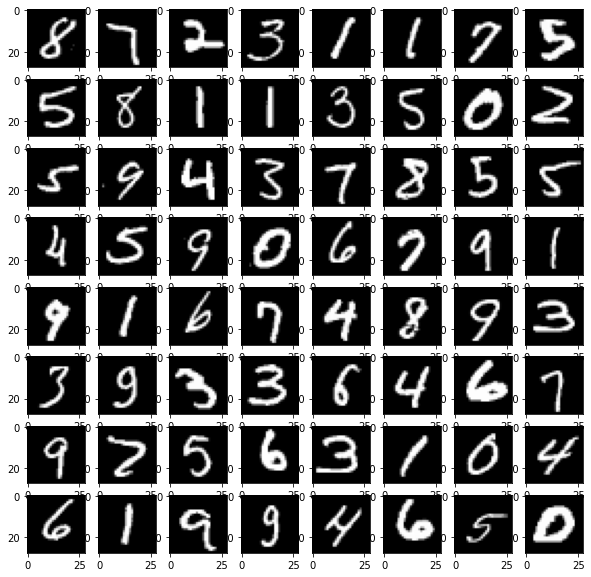

['8', '7', '2', '3', '1', '1', '7', '5']
['5', '8', '1', '1', '3', '5', '0', '2']
['5', '9', '4', '3', '7', '8', '5', '5']
['4', '5', '9', '0', '6', '7', '9', '1']
['9', '1', '6', '7', '4', '8', '9', '3']
['3', '9', '3', '3', '6', '4', '6', '7']
['9', '7', '5', '6', '3', '1', '0', '4']
['6', '1', '9', '9', '4', '6', '5', '0']


In [ ]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
import matplotlib.pyplot as plt
import numpy as np
import random

if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Grab a sample image
i = 0
sample_number = 64
plt.figure(figsize = (10,10))

class_type = []
for idx in random.sample(range(1,10000), sample_number):
  i += 1
  plt.subplot(8, 8, i)
  tensor = trainset.__getitem__(idx)[0]
  class_type.append(classes[trainset.__getitem__(idx)[1]])
  image = np.squeeze(tensor.numpy())
  image = (image - np.min(image)) / (np.max(image) - np.min(image))
  # image = image.transpose((1, 2, 0))
  plt.imshow(image, cmap='gray')
plt.show()
for i in range(8):
  print(class_type[i*8:(i+1)*8])

In [ ]:
# options
dataset = 'cifar10' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


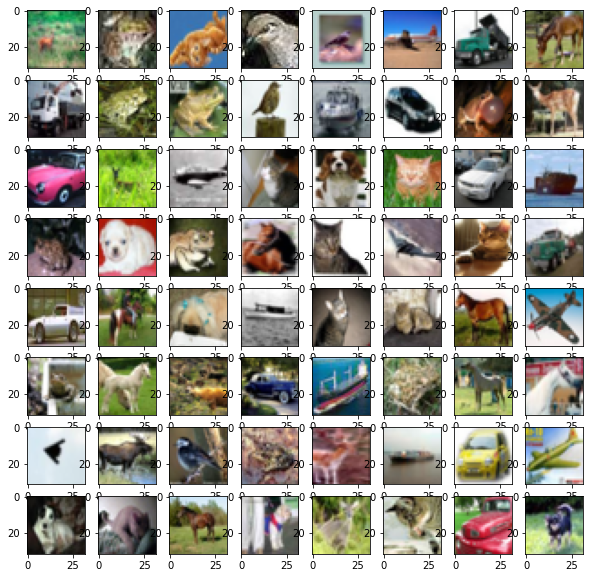

['deer', 'frog', 'cat', 'bird', 'bird', 'plane', 'truck', 'horse']
['truck', 'frog', 'frog', 'bird', 'ship', 'car', 'frog', 'deer']
['car', 'deer', 'plane', 'cat', 'dog', 'cat', 'car', 'ship']
['frog', 'dog', 'frog', 'horse', 'cat', 'plane', 'cat', 'truck']
['car', 'horse', 'dog', 'ship', 'cat', 'cat', 'horse', 'plane']
['frog', 'horse', 'deer', 'car', 'ship', 'frog', 'horse', 'horse']
['plane', 'deer', 'bird', 'frog', 'deer', 'ship', 'car', 'plane']
['dog', 'cat', 'horse', 'dog', 'deer', 'cat', 'car', 'dog']


In [ ]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# Grab a sample image
i = 0
sample_number = 64
class_type = []
plt.figure(figsize = (10,10))
for idx in random.sample(range(1,10000), sample_number):
  i += 1
  plt.subplot(8, 8, i)
  tensor = trainset.__getitem__(idx)[0]
  class_type.append(classes[trainset.__getitem__(idx)[1]])
  image = np.squeeze(tensor.numpy())
  image = (image - np.min(image)) / (np.max(image) - np.min(image))
  image = image.transpose((1, 2, 0))
  plt.imshow(image)
plt.show()
for i in range(8):
  print(class_type[i*8:(i+1)*8])

# Training a Single Layer Network on MNIST：

In [ ]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
for epoch in range(epochs):
  train(epoch+1)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.343931
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.496405
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.540803
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.302648
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.399379
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.339342
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.399733
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.347407
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.289240
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.512629
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.266208
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.249330
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.430222
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.244554
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.315815
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.202796
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.315108
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.257654
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.184038
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.254475
Train Epoch:

In [ ]:
test()


Test set: Average loss: 0.3353, Accuracy: 9078/10000 (91%)



Linear(in_features=784, out_features=10, bias=True)
2
(10, 784)


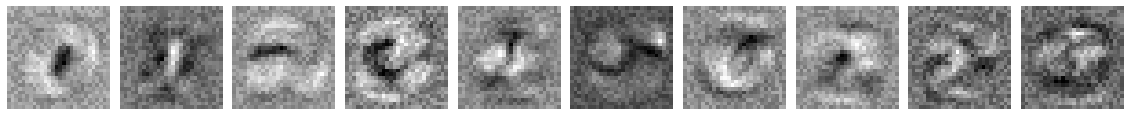

In [ ]:
def plot_kernels(tensor, num_cols=10):
    print(tensor.ndim)
    print(tensor.shape)
    num_kernels = tensor.shape[0]
    num_rows = 1
    fig = plt.figure(figsize=(num_cols*2,num_rows*2))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i].reshape(28,28), cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

layer = network.linear
print(layer)
tensor = layer.weight.data.numpy()
plot_kernels(tensor)

The four following blocks show what happened to our training when we use only 50 data:

In [ ]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
trainset.data = trainset.data[:50]
testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(epochs):
  train(epoch+1)

Train Epoch: 1 [0/50 (0%)]	Loss: 2.365758
Train Epoch: 2 [0/50 (0%)]	Loss: 2.144295
Train Epoch: 3 [0/50 (0%)]	Loss: 1.959971
Train Epoch: 4 [0/50 (0%)]	Loss: 1.801503
Train Epoch: 5 [0/50 (0%)]	Loss: 1.662865
Train Epoch: 6 [0/50 (0%)]	Loss: 1.540506
Train Epoch: 7 [0/50 (0%)]	Loss: 1.431940
Train Epoch: 8 [0/50 (0%)]	Loss: 1.335189
Train Epoch: 9 [0/50 (0%)]	Loss: 1.248603
Train Epoch: 10 [0/50 (0%)]	Loss: 1.170800


In [ ]:
test()


Test set: Average loss: 1.7021, Accuracy: 5049/10000 (50%)



The outcome shows that the final outcome droped significantly compared with our previous trial.


Possible reasons for the inperfect observation:

Small dataset may fail to tune all the model parameters well, which leads to under-fitted model and worse outcome. And the big batch size (64) also decrease the efficiency of data-utilizing.

# Training a Multi-Layer Network on MNIST:

In [ ]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
hidden_sizes = [1000]

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, hidden_sizes):
        super(Net, self).__init__()
        self.model =  nn.Sequential(nn.Linear(num_inputs, hidden_sizes[0]),
                      nn.Tanh(),
                      nn.Linear(hidden_sizes[0], num_outputs))

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.model(input)
        return output

network = Net(num_inputs, num_outputs, hidden_sizes)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

following is the 

In [ ]:
for epoch in range(epochs):
  train(epoch+1)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.281878
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.672578
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.620033
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.391601
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.509414
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.336321
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.387293
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.281907
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.261476
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.286645
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.295054
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.264374
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.398793
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.270333
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.326721
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.235406
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.442265
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.156123
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.213564
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.355665
Train Epoch:

In [ ]:
test()


Test set: Average loss: 0.1602, Accuracy: 9552/10000 (96%)



In [ ]:
lr = 10
for epoch in range(epochs):
  train(epoch+1)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.329414
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1482.209229
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1379.132568
Train Epoch: 1 [19200/60000 (32%)]	Loss: 683.609863
Train Epoch: 1 [25600/60000 (43%)]	Loss: 703.827820
Train Epoch: 1 [32000/60000 (53%)]	Loss: 217.920227
Train Epoch: 1 [38400/60000 (64%)]	Loss: 796.631104
Train Epoch: 1 [44800/60000 (75%)]	Loss: 436.985413
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1066.457642
Train Epoch: 1 [57600/60000 (96%)]	Loss: 555.501404
Train Epoch: 2 [0/60000 (0%)]	Loss: 376.064819
Train Epoch: 2 [6400/60000 (11%)]	Loss: 315.588165
Train Epoch: 2 [12800/60000 (21%)]	Loss: 703.674927
Train Epoch: 2 [19200/60000 (32%)]	Loss: 330.635223
Train Epoch: 2 [25600/60000 (43%)]	Loss: 861.915466
Train Epoch: 2 [32000/60000 (53%)]	Loss: 405.210510
Train Epoch: 2 [38400/60000 (64%)]	Loss: 366.947052
Train Epoch: 2 [44800/60000 (75%)]	Loss: 202.330032
Train Epoch: 2 [51200/60000 (85%)]	Loss: 121.081573
Train Epoch: 2 [57600/6

In [ ]:
test()


Test set: Average loss: 414.8530, Accuracy: 4985/10000 (50%)



The loss throughout the training process stay high, and flutuated a lot. Although we do observe a certain degree of convergence, we end up with high loss and very bad accuracy. This trail implies that the model can not converge to the optimum under a overlarge learning rate, because it is too easy for the model to jump across the optimum without coming closer.

# Training a Convolutional Network on CIFAR：

In [ ]:
## network and optimizer
num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # kernel
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 128, 5)
        self.fc1 = nn.Linear(25 * 128, 64)
        self.fc2 = nn.Linear(64, num_outputs)

    def forward(self, x):
        x = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        x = F.max_pool2d(torch.tanh(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = torch.tanh(self.fc1(x))
        output = self.fc2(x)
        return F.log_softmax(output, dim=1)

network = Net()
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


following is the training record for convolution network on CIFAR:

In [ ]:
for epoch in range(20):
  train(epoch+1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.316564
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.160889
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.966199
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.938277
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.900118
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.947333
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.686761
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.778305
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.935538
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.846452
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.712691
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.629429
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.602563
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.595719
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.472243
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.543611
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.675222
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.629896
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.608326
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.720460
Train Epoch: 3 [25

In [ ]:
test()


Test set: Average loss: 0.9458, Accuracy: 6707/10000 (67%)



following is the visualization of filter parameters for conv1:

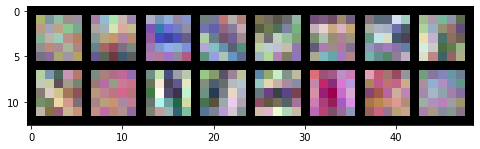

In [ ]:
from torchvision import utils

def plot_kernels(tensor, nrow=8):
    num_kernels = tensor.shape[0]
    tensor = torch.tensor(tensor.numpy().transpose(0, 2, 3, 1))
    print(tensor.shape)
    num_rows = 2
    fig = plt.figure(figsize=(num_cols*2,num_rows*2))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i])
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=1)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

layer = network.conv1
tensor = layer.weight.data.clone()
plot_kernels(tensor)

In [ ]:
print(network)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=3200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


number of parameter:

---

conv1:  3*16*5*5+16=1216

---

conv2:  16*128*5*5+128=51328

---
fc1:   64*3200+64=204864

---
fc2:  10*64+10=650

---

total:  258058

In [ ]:
print(network.conv2.bias.size())

torch.Size([128])
